<a href="https://colab.research.google.com/github/Xiqi-Li/CTD/blob/master/Colab_CTD_0219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enable editing by making a copy <a name="make-copy"></a>

To enable **editing** of the notebook please make a copy of it and place it into your google drive. Please click on: `"File" -> "Save a copy in Drive"`. Allow access to your google drive if requested. 

For more details on how to use Google Colab please refer to the [Colab docs](https://colab.research.google.com/notebooks/welcome.ipynb).

# Setup R environment <a name="setup-r"></a>
Please run this command **before any analysis** and **each time you start a new session**!

In [0]:
download.file(destfile="r-env-setup-script.R", 
    url="https://raw.githubusercontent.com/BRL-BCM/CTD/master/vignette/r-env-setup-script.R")
# temporarily using Xiqi-Li fork
source("r-env-setup-script.R")
print("Setup done")

Download R package cache

Unzipping R package cache



[1] "Setup done"


# Connect the Dots (CTD) example <a name="ctd-example"></a>

See documentation for [`CTD`](https://github.com/BRL-BCM/CTD/blob/master/CTD.pdf) to familiarize yourself with the range of functionalities offered. 

In [0]:
# Load package to verify libraries have been successfully setup.
require(CTD)
# Load z-scored data matrices of sample data from Thistlethwaite et al. (2019).
data(Thistlethwaite2019)
data_mx = as.matrix(data_mx)
data_mx = suppressWarnings(apply(data_mx, c(1,2), as.numeric))
data_mx = data_mx[,-c(1,2,3,4,5,6,7,8)]
print(dim(data_mx))


Loading required package: CTD

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: plotly

Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:igraph’:

    groups


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: gplots


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: RColorBrewer

Loading required package: gmp


Attaching package: ‘gmp’


The following objects are masked from ‘package:base’:

    %*%, apply, crossprod, matrix, tcrossprod




[1] 772 271


Now we can run the analyses to reproduce results from Thistlethwaite et al. (2019).

1.   **Visualize** individual or average cohort metabolomics profiles on comprehensive or individual **pathway maps from MetaboLync**, curated by Metabolon.
2.   Interpret individual metabolomics profiles or perform case-control comparisons of metabolomics data using **set-based** and **topological-based pathway enrichment analysis methods**. Compare CTD to pathway enrichment methods by i) sensitivity to detect relevant disease-specific metabolite perturbation patterns, ii) disease specificity of patterns detected.
4.   Estimate the **probability** and **significance** of a metabolite set against different disease-specific network contexts using CTD.
5.   Calculate **patient similarity** using CTDsim.



## Plot individual metabolomics profiles onto biochemical pathway maps.

Warning message in dir.create("./output", showWarnings = TRUE):
“'./output' already exists”
Warning message in dir.create("./output/pathwaymap", showWarnings = TRUE):
“'./output/pathwaymap' already exists”


[1] "All Pathways"                       "Arginine Metabolism"               
 [3] "Ascorbate Metabolism"               "Asp Glu Metabolism"                
 [5] "BCAA Metabolism"                    "Benzoate Metabolism"               
 [7] "Beta Oxidation"                     "Bile Acid Metabolism"              
 [9] "Carbamoylphosphate Pathway"         "Carnitine Biosynthesis"            
[11] "Cholesterol Synthesis"              "Creatine Metabolism"               
[13] "DicarboxylicAcid Metabolism"        "Eicosanoids"                       
[15] "Endocannabinoid Synthesis"          "FattyAcid Metabolism"              
[17] "Fibrinogen Cleavage Peptides"       "GABA Shunt"                        
[19] "Galactose Metabolism"               "Glutathione Metabolism"            
[21] "Gly Ser Thr Metabolism"             "Glycogen Metabolism"               
[23] "Glycolysis"                         "Glycosylation"                     
[25] "Hemoglobin Porphyrin Metabolism"    "Histidine Metabolism"              
[27] "Inositol Metabolism"                "Ketone Bodies"                     
[29] "Lysine Catabolism"                  "Met Cys Metabolism"                
[31] "Mevalonate Metabolism"              "Nicotinate Nicotinamide Metabolism"
[33] "Pantothenate Metabolism"            "Pentose Phosphate Metabolism"      
[35] "Phe Tyr Metabolism"                 "Phospholipid Metabolism"           
[37] "Polyamine Metabolism"               "Proline Metabolism"                
[39] "Protein Degradation"                "Purine Metabolism"                 
[41] "Pyridoxal Metabolism"               "Pyrimidine Metabolism"             
[43] "Riboflavin Metabolism"              "Secondary Bile Acids"              
[45] "Sorbitol Glycerol Metabolism"       "Sphingolipid Metabolism"           
[47] "Steroid Hormone Biosynthesis"       "TCA Cycle"                         
[49] "Thyroid Hormone Synthesis"          "Tryptophan Metabolism"

[1] "proteinogeneic amino acid: 0.050000"
[1] "long chain acyl-coa / long chain fatty acids: 0.066667"
[1] "long-chain 3-hydroxy fatty acid: 0.333333"
[1] "gamma-glutamyl amino acid: 0.142857"
[1] "gamma-glutamyl amino acid: 0.142857"
[1] "long chain fatty acid: 0.066667"
[1] "medium chain fatty acid: 0.222222"
[1] "amino acid: 0.050000"
[1] "xenobiotic: chemical: 0.058824"
[1] "xenobiotic: xanthine metabolism: 0.571429"
[1] "xenobiotic: drug: 0.153846"
[1] "dietary: plant compoent: 0.096774"
[1] "dipeptide: 0.090909"
[1] "n-acetyl-amino acids: 0.222222"


png 
  2

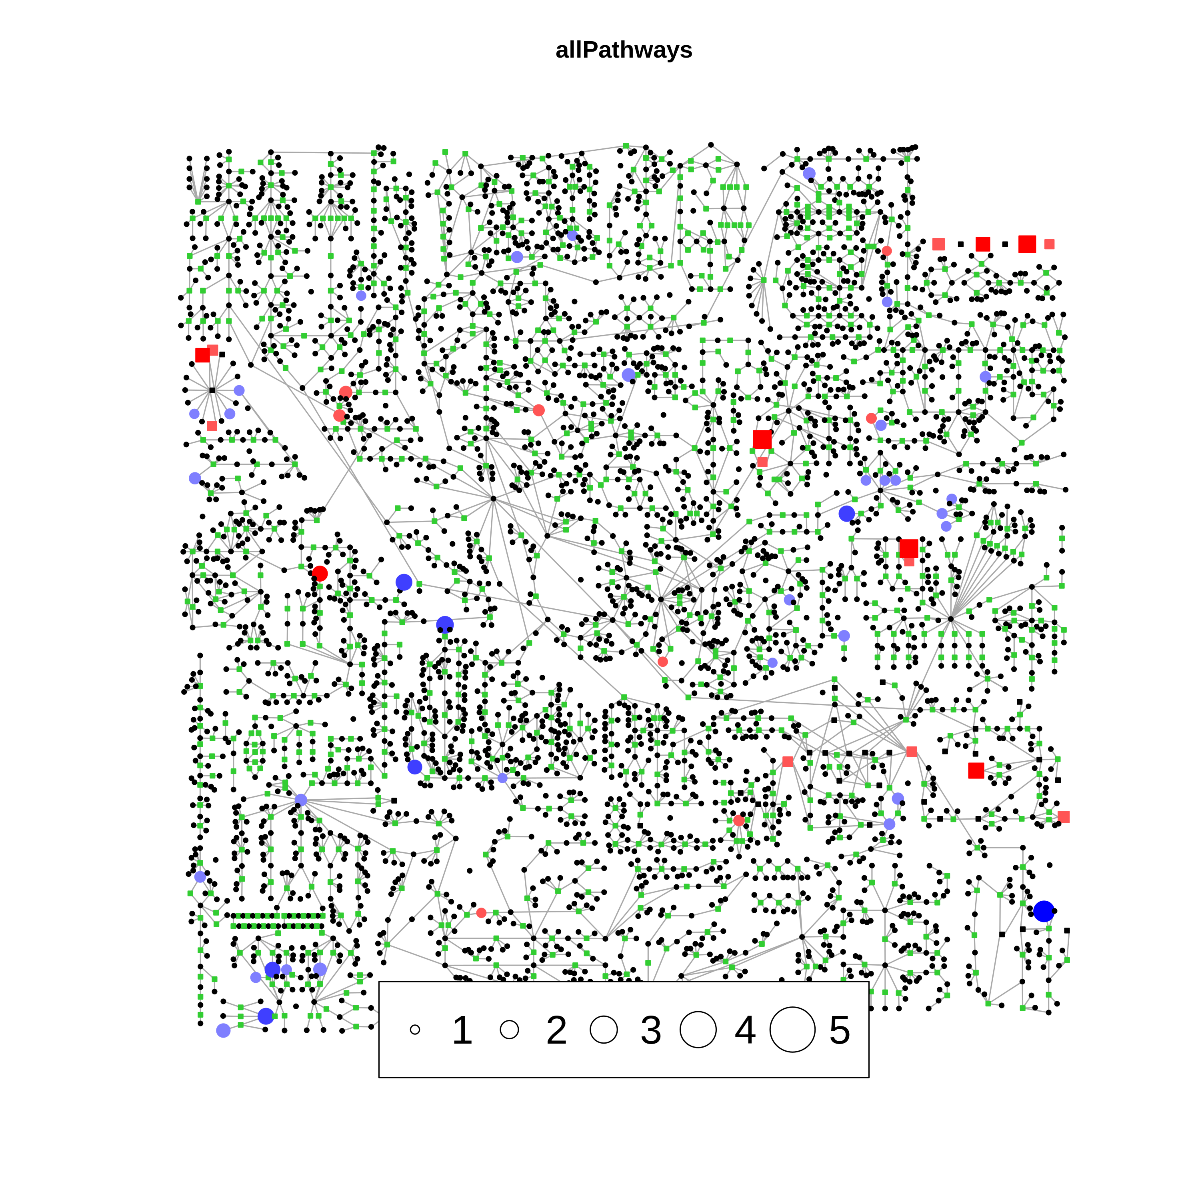

In [0]:
# Create an output directory
dir.create("./output", showWarnings = TRUE)
dir.create("./output/pathwaymap", showWarnings = TRUE)

# Return a list of pathway maps curated by Metabolon's Metabolync.
pathway.ListMaps_metabolon() 

# Generate pathway map with patient perturbation data superimposed on "all Pathway" map;
# Save "allPathways-AADC001.png" to "/content";
# Output percentage of mapped metabolites in each sub-pathway.
plot.pathwayMap("allPathways", "AADC001", data_mx[,"AADC001"], 1, 1, out.path="./output/pathwaymap", SVG = FALSE)

# Display pathway map
if (!require(png)) {
  install.packages('png')
  library(png)
}
require(grid)
img <- readPNG('./output/pathwaymap/allPathways-AADC001.png')
grid::grid.raster(img)

## Interpret individual metabolomics profiles using CTD.

Before we start the analysis, we need to prepare some global variables and tuning parameters.

**Global Variables**
> * **G** - a list object with metabolite node names as list element names and a numeric probability, set initially to 0 for all elements.
> * **adjacency_matrix** - a list object containing any number of adjacency matrices for one or more networks

**Tuning parameters (defaults)**
> * **p0** = 0.1
> * **p1** = 0.9
> * **thresholdDiff** = 0.01



In [0]:
# load GABAT network as "ig"
require(R.utils)
ig = loadToEnv(system.file('networks', 'bg_abat_maps_naive.RData', package='CTD'))[['ig_pruned']]

# get "ig" derived adjacency matrix
G = vector(mode="list", length=length(V(ig)$name))
names(G) = V(ig)$name
adjacency_matrix = list(as.matrix(get.adjacency(ig, attr="weight")))

# set global variables
p0 = 0.1 
p1 = 0.9
thresholdDiff = 0.01

Now, we are ready to estimate probabilities of patient's metabolite perturbations in disease contexts. This process may take a few minutes.

In [0]:
# create output directory
dir.create("./output/MultiNode", showWarnings = TRUE)

df = data.frame(ptID=character(), S=character(), lenS=numeric(), optT=numeric(),
              fishers=numeric(), I0=numeric(), IA=numeric(), d=numeric(), stringsAsFactors = FALSE)

data_mx = data_mx[which(rownames(data_mx) %in% V(ig)$name),]
data_mx = data_mx[!grepl("x - ", rownames(data_mx)),] # remove unannotated metabolites
# choose the patients you are interested in
p.ind = which(colnames(data_mx) %in% c("AADC002",'GABAT004','ADSL003'))
# construct matrix of p-values by matix of z-scores.
data.pvals = apply(data_mx[,p.ind], c(1,2), function(i) 2*pnorm(abs(i), lower.tail = FALSE))
data.pvals = t(data.pvals)

# set the size of subset of nodes of interest
kmx=15 # you can change this
r=1
ptBSbyK = list()
for (p in p.ind) {
  ptID = colnames(data_mx)[p]
  print(sprintf("Patient %d/%d...", p, ncol(data_mx)))
  diag = gsub("[[:digit:]]", "", colnames(data_mx)[p])
  S = data_mx[order(abs(data_mx[,p]), decreasing = TRUE),p][1:kmx]
  # Generate the "adaptive walk" node rankings, starting from a given perturbed variable
  ranks = multiNode.getNodeRanks(names(S), G)
  ptBSbyK[[ptID]] = multiNode.getPtBSbyK(names(S), ranks)
  res = mle.getEncodingLength(ptBSbyK[[ptID]], data.pvals, ptID, G)
  for (k in 1:kmx) {
    df[r, "ptID"] = colnames(data_mx)[p]
    df[r, "diag"] = diag
    df[r, "S"] = paste(names(S)[1:k], collapse="/")
    df[r, "lenS"] = k
    df[r, "optT"] = res[k, "opt.T"]
    df[r, "fishers"] = res[k, "fishers.Info"]
    df[r, "I0"] = res[k, "IS.null"]
    df[r, "IA"] = res[k, "IS.alt"]
    df[r, "d"] = res[k, "d.score"]
    r = r + 1
  }
  save(ptBSbyK, df, file=sprintf("./output/MultiNode/mn_model_%s_maps_%d.RData",'abat',kmx))
}

Warning message in dir.create("./output/MultiNode", showWarnings = TRUE):
“'./output/MultiNode' already exists”


[1] "Patient 2/271..."
[1] "Patient 7/271..."
[1] "Patient 13/271..."


We can visualize the CTD-determined maximum compressed subset of the example patients' perturbed metabolites.

In [0]:
load(sprintf("./output/MultiNode/mn_model_%s_maps_%d.RData",'abat',kmx))
ptID = 'GABAT004'
mets = ptBSbyK[[ptID]][[which.max(df[df$ptID == ptID,'d'])]]
mets = names(mets[mets == 1])
mets # the names of the metabolites in the maximum compressed subset of nodes
write.table(mets, sprintf('./output/MultiNode/mn_mets_%s_%s_%d.tsv',ptID,'abat',kmx), quote = FALSE, sep = '\t')

# plot the connectiveness of these metabolites.
e = delete.vertices(ig, v=V(ig)$name[-which(V(ig)$name %in% mets)])
e = delete.vertices(e, v=names(which(degree(e)==0)))
png('./output/MultiNode/ADSL003_module.png')
plot.igraph(e, layout=layout.circle, edge.width=50*abs(E(e)$weight))
dev.off()

[1] "phenol sulfate"          "oleoylcarnitine"        
 [3] "n-palmitoyltaurine"      "2-hydroxyoctanoate"     
 [5] "trans-urocanate"         "n-acetylglycine"        
 [7] "2-oleoylglycerol (18:1)" "4-guanidinobutanoate"   
 [9] "2-pyrrolidinone"         "succinamic acid"        
[11] "n-formylphenylalanine"

png 
  2

## Estimate the probability and significance of a metabolite set against different disease-specific network contexts using CTD.

Now we can visualize significance of best compressed sets of metabolites for all patients when interpreted with GBA-T network. 

We provided the dataframe of encoding siginificnace for all perturbed metabolite sets interpreted with GABAT disease networks in order to save computational resources. However you can find the code we used to generate this dataframe under {r ctd_multi-node} here: https://github.com/BRL-BCM/CTD/blob/master/vignette/Methods_paper_FINAL.Rmd 


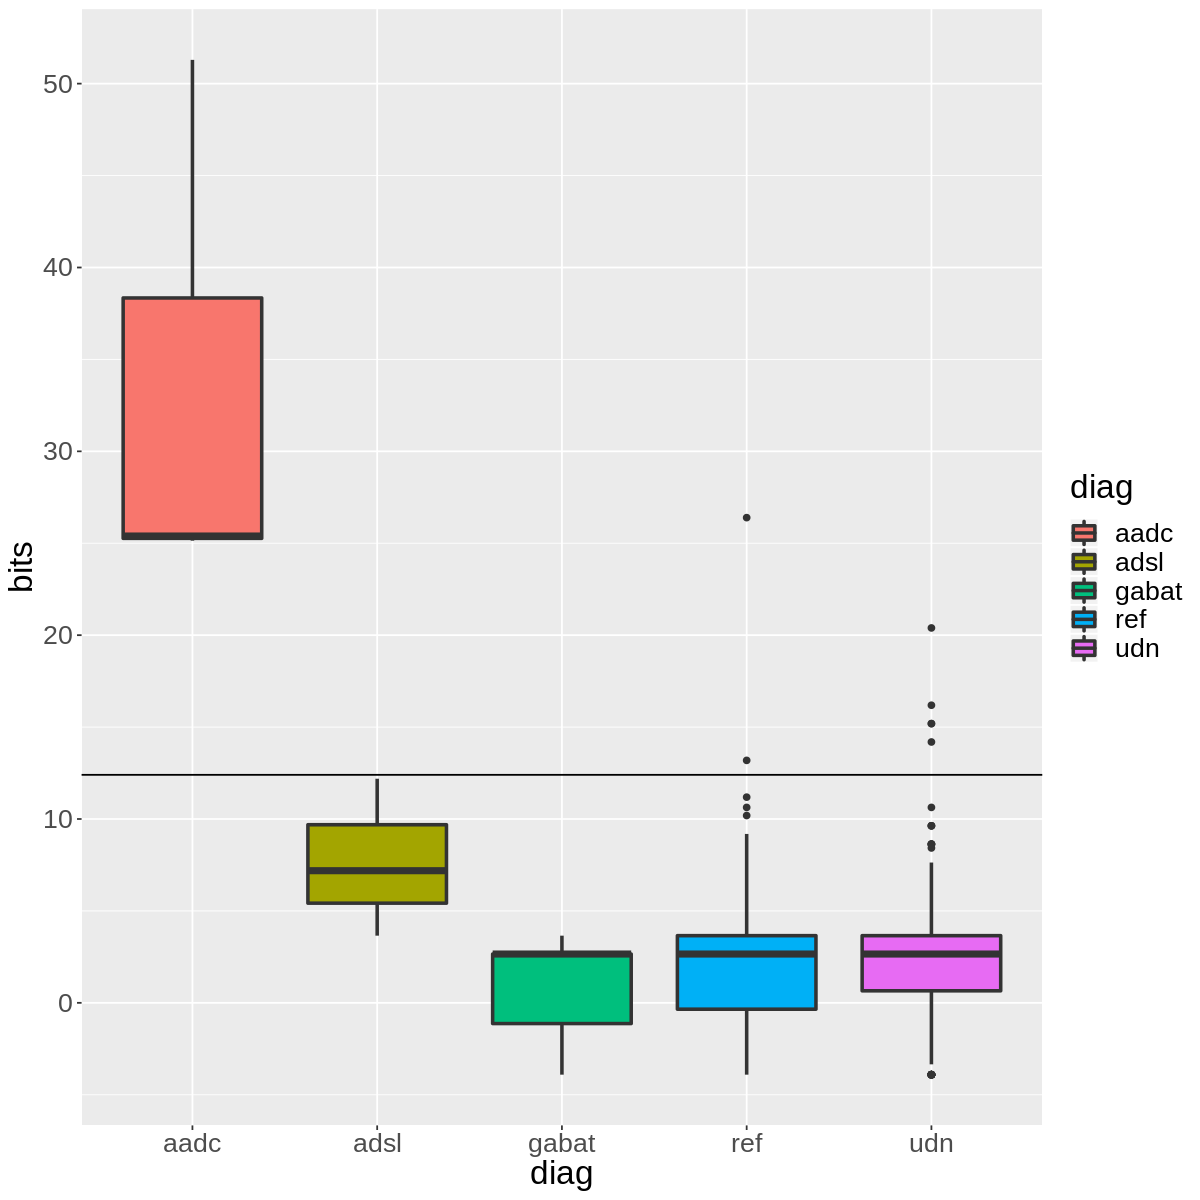

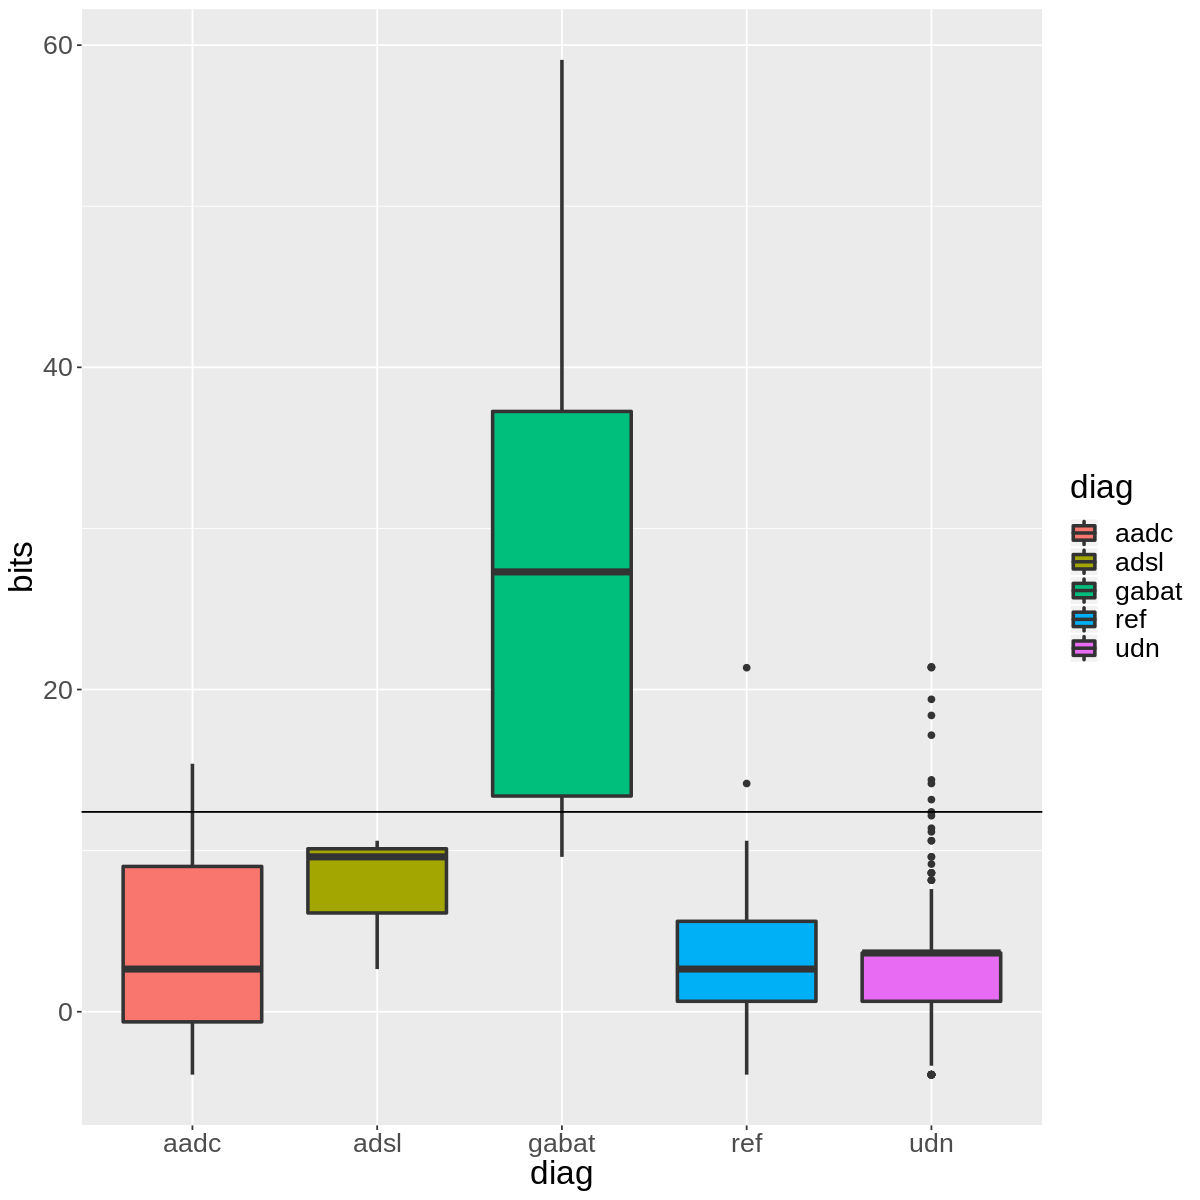

png 
  2

png 
  2

png 
  2

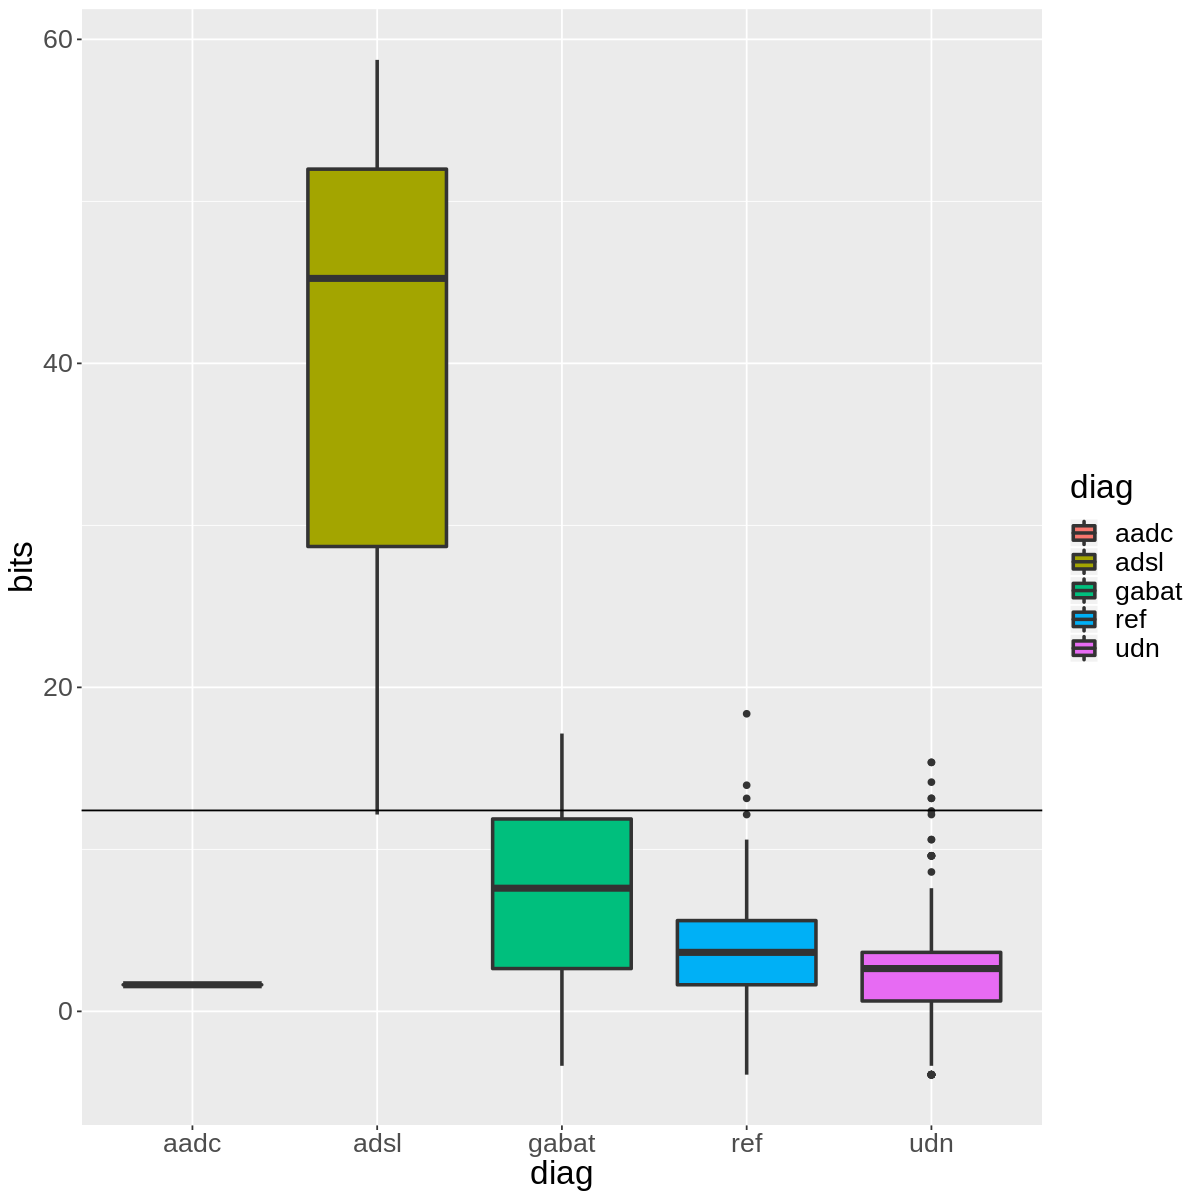

In [0]:
p=list()
for (model in c('aadc','abat','adsl')){
  load(sprintf('./sup_data/Encoding/mn_model_%s_maps.RData',model))
  pts = unique(df$ptID)
  df_best = data.frame(pt=numeric(), bits=numeric(), diag=character(), stringsAsFactors = FALSE)
  for (pt in 1:length(pts)) {
    pt_data = df[which(df$ptID==pts[pt]),]
    df_best[pt, "pt"] = pts[pt]
    df_best[pt, "bits"] = max(df[which(df$ptID==pts[pt]), "d"])-log2(kmx)
    df_best[pt, "diag"] = unique(pt_data[,"diag"])
  }
  p[[model]]<-ggplot(df_best, aes(x=diag, y=bits, fill=diag)) +
  # bonferroni corrected p-value cut-off
  geom_boxplot(size=1) + geom_hline(yintercept=-log2(0.05)+log2(length(pts))) + 
  theme(text = element_text(size=20))
}
p[[1]]
p[[2]]
p[[3]]

model='aadc'
png(sprintf("./output/%s_bg_naive.png", model), height=1000, width=1500, res=350)
  p[[model]]
dev.off()

model='abat'
png(sprintf("./output/%s_bg_naive.png", model), height=1000, width=1500, res=350)
  p[[model]]
dev.off()

model='adsl'
png(sprintf("./output/%s_bg_naive.png", model), height=1000, width=1500, res=350)
  p[[model]]
dev.off()

We can encode our metabolite subsets using one of two different encoding algorithms. 

> * **Fixed diffusion encoding algorithm** - singleNode.getPtBSbyK()
> * **Adaptive diffusion encoding algorithm** - multiNode.getNodeRanks()


We have already showed the encoding of patient using a adaptive diffusion algorithm above. Now we will used fixed diffusion encoding algorithm to encode. 


In [0]:
rm(list=ls())
# set global environment
p0 = 0.1 
p1 = 0.9
thresholdDiff = 0.01

kmx=15
# reset dataset
data(Thistlethwaite2019)
data_mx = as.matrix(data_mx)
data_mx = suppressWarnings(apply(data_mx, c(1,2), as.numeric))
data_mx = data_mx[,-c(1,2,3,4,5,6,7,8)]

In [0]:
# create output directory
dir.create("./output/SingleNode", showWarnings = TRUE)

ptBSbyK=list()

ig = loadToEnv(system.file('networks', 'bg_abat_maps_naive.RData', package='CTD'))[["ig_pruned"]]
adjacency_matrix = list(as.matrix(get.adjacency(ig, attr="weight")))
G = vector(mode="list", length=length(V(ig)$name))
names(G) = V(ig)$name

data_mx = data_mx[which(rownames(data_mx) %in% V(ig)$name),]
data_mx = data_mx[!grepl("x - ", rownames(data_mx)),]

data.pvals = apply(data_mx, c(1,2), function(i) 2*pnorm(abs(i), lower.tail = FALSE))
data.pvals = t(data.pvals)

p = which(colnames(data_mx)=="GABAT004")
ptID = colnames(data_mx)[p]
S = data_mx[order(abs(data_mx[,p]), decreasing = TRUE),p][1:kmx]
perms = list()
for (i in 1:length(S)) {
  ind = which(names(G)==names(S)[i])
  perms[[names(S)[i]]] = singleNode.getNodeRanksN(ind, G, S, log2(length(G)))
}
ptBSbyK[[ptID]] = singleNode.getPtBSbyK(names(S), perms)
res = mle.getEncodingLength(ptBSbyK[[ptID]], data.pvals, ptID, G)
d1=res[which.max(res[,"d.score"]),]
d2=S[names(which(ptBSbyK[[ptID]][[which.max(res[,"d.score"])]]==1))]
write.table(d2, sprintf('./output/SingleNode/sn_mets_%s_%s_%d.tsv',ptID,'abat',kmx), quote = FALSE, sep = '\t')
d3=2^-res[which.max(res[,"d.score"]),"d.score"]
d4=2^-(res[which.max(res[,"d.score"]),"d.score"]-log2(nrow(res)))
d1
d2
sprintf('raw p-value: %e',d3)
sprintf('p- value after Bonferoroni correction: %e',d4)
save(d1,d2,d3,d4, file = sprintf('./output/SingleNode/sn_bestmodule_%s_%s_%d.RData',ptID,'abat',kmx))


,patientID,optimalBS,subsetSize,opt.T,varPvalue,fishers.Info,IS.null,IS.alt,d.score
,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
5,GABAT004,TTTTT,5,5,9.9e-03/4.7e-03/1.7e-05/1.9e-06/2.2e-06,50.23119,40.85644,13.55651,27.3


oleoylcarnitine   n-palmitoyltaurine      succinamic acid 
            2.579821             2.828822             4.296444 
4-guanidinobutanoate      2-pyrrolidinone 
            4.762071             4.734500

[1] "raw p-value: 6.051752e-09"

[1] "p- value after Bonferoroni correction: 9.077628e-08"

In [0]:
# compare single-node and multi-node

# reset dataset
data(Thistlethwaite2019)
data_mx = as.matrix(data_mx)
data_mx = suppressWarnings(apply(data_mx, c(1,2), as.numeric))
data_mx = data_mx[,-c(1,2,3,4,5,6,7,8)]

# best compressed node subset with multi-node diffusion
mn_mets=unlist(read.table(file = './output/MultiNode/mn_mets_GABAT004_abat_15.tsv',header = TRUE, sep = '\t',na.strings = NA,stringsAsFactors = FALSE))
names(mn_mets)=mn_mets
mn_mets=data_mx[match(names(mn_mets),rownames(data_mx)),'GABAT004']
load('./output/MultiNode/mn_model_abat_maps_15.RData')
mn_sig=2^-(max(df$d)-log2(nrow(res)))

# best compressed node subset with single-node diffusion
load('./output/SingleNode/sn_bestmodule_GABAT004_abat_15.RData')
sn_mets=d2
sn_sig=d4

all_mets=sort(unique(names(mn_mets),names(sn_mets)))
df=data.frame(Metabolite_Set=all_mets,
              z_score=mn_mets[all_mets],
              Single_node_Diffusion=all_mets %in% names(sn_mets),
              Multi_node_Diffusion=all_mets %in% names(mn_mets),
              Single_node_P_vaule=sn_sig,
              Multi_node_P_vaule=mn_sig)
rownames(df)<-NULL
df
##interactive table formatting not compatible with colab
# require(DT)
# datatable(df) %>%
# formatStyle(
#   'Metabolite_Set',
#   target = 'cell',
#   backgroundColor = styleEqual(c('2-pyrrolidinone'),'green')
# )

Metabolite_Set,z_score,Single_node_Diffusion,Multi_node_Diffusion,Single_node_P_vaule,Multi_node_P_vaule
<fct>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>
2-hydroxyoctanoate,-2.760761,FALSE,TRUE,9.077628e-08,2.360512e-11
2-oleoylglycerol (18:1),2.309677,FALSE,TRUE,9.077628e-08,2.360512e-11
2-pyrrolidinone,4.734500,TRUE,TRUE,9.077628e-08,2.360512e-11
4-guanidinobutanoate,4.762071,TRUE,TRUE,9.077628e-08,2.360512e-11
n-acetylglycine,2.475675,FALSE,TRUE,9.077628e-08,2.360512e-11
n-formylphenylalanine,-2.410659,FALSE,TRUE,9.077628e-08,2.360512e-11
n-palmitoyltaurine,2.828822,TRUE,TRUE,9.077628e-08,2.360512e-11
oleoylcarnitine,2.579821,TRUE,TRUE,9.077628e-08,2.360512e-11
phenol sulfate,3.381268,FALSE,TRUE,9.077628e-08,2.360512e-11


You can next visulaize the adundance of known biomarkers and potential biomarkers we identified in cases and non-cases.

Warning message:
“Removed 96 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 96 rows containing non-finite values (stat_boxplot).”


png 
  2

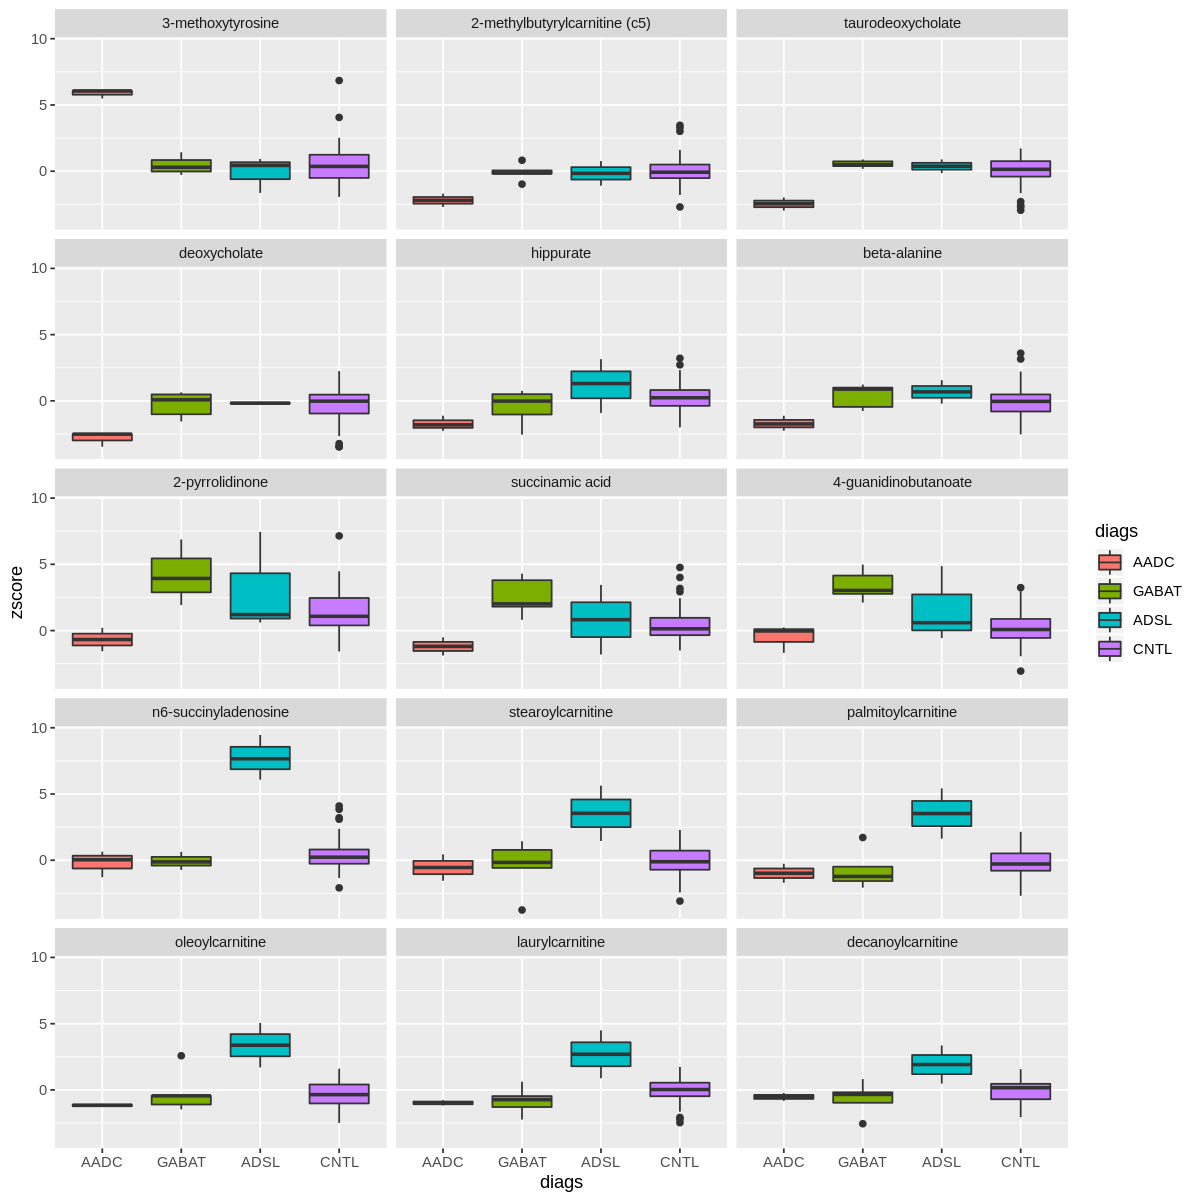

In [0]:
bm_k = list(AADC=c('3-methoxytyrosine'),
            GABAT=c('2-pyrrolidinone','succinamic acid'),
            ADSL=c('n6-succinyladenosine'))
bm_p = list(AADC=c('2-methylbutyrylcarnitine (c5)',
                    'taurodeoxycholate',
                    'deoxycholate',
                    'hippurate',
                    'beta-alanine'),
            GABAT=c('4-guanidinobutanoate'),
            ADSL=c('stearoylcarnitine',
                    "palmitoylcarnitine", 
                    "oleoylcarnitine",
                    "laurylcarnitine",
                    "decanoylcarnitine"))
bm=list()
for (dis in names(bm_k)){bm[[dis]]=list(k=bm_k[[dis]],p=bm_p[[dis]])}

# reset dataset
data(Thistlethwaite2019)
data_mx = suppressWarnings(apply(as.matrix(data_mx), c(1,2), as.numeric))[,-c(1,2,3,4,5,6,7,8)]

diags = toupper(gsub("[[:digit:]]", "", colnames(data_mx)))
diags[grep("REF", diags)] = "CNTL"

data_mx2 = data_mx[match(unlist(unlist(bm)),rownames(data_mx)),-grep("UDN",diags)]
diags = diags[-grep("UDN",diags)]

require(reshape2)
dff=melt(data_mx2)
colnames(dff) =c('met','ptID','zscore')
tmp = as.factor(c(sapply(diags, function(x) rep(x, nrow(data_mx2)))))
dff$diags = factor(tmp,levels(tmp)[c(1,4,2,3)])

p <- ggplot(data = dff, aes(x=diags, y=zscore, fill=diags)) + geom_boxplot(size=0.5) + facet_wrap(~met,ncol=3)
p

png("./output/green_yellow_mets.png", width = 15, height = 10)
p
dev.off()


## Calculate patient similarity using CTDsim.

Previously we computed node rankings of top 15 pertubed metabolites in pateint GABAT004 within GABA-T disease networks. In the following section, we provided precomputed node rankings "DISEASEnaive-ranks.RData" given a background network graphs (refer to {r ctd_multi-node} in https://github.com/BRL-BCM/CTD/blob/master/vignette/Methods_paper_FINAL.Rmd)

Samples selected for this analysis are consist of confirmed patients,significant undiagnosed cases with biomarkers detected within best co-perturbed metabolite set and reference samples that are not significant. For the selection process, refer to {r udn_matches_both_encodings} in https://github.com/BRL-BCM/CTD/blob/master/vignette/Methods_paper_FINAL.Rmd)


In [0]:
rm(list=ls())
# set global environment
p0 = 0.1 
p1 = 0.9
thresholdDiff = 0.01

kmx=30

#reset data_mx
data(Thistlethwaite2019)
data_mx = as.matrix(data_mx)
data_mx = suppressWarnings(apply(data_mx, c(1,2), as.numeric))

## select samples of interest
udn_bm=c("UDN121","UDN059","UDN099","UDN154")
refs_no_hits=c("REF004","REF005","REF006","REF011","REF018","REF032","REF042","REF044","REF046","REF047","REF054")

data_mx = data_mx[, c(grep("AADC|GABAT|ADSL", colnames(data_mx)),
                      which(colnames(data_mx) %in% udn_bm),
                      which(colnames(data_mx) %in% refs_no_hits))]
rm(udn_bm,refs_no_hits)

# create output directory
dir.create("./output/ptSim", showWarnings = TRUE)

Warning message in dir.create("./output/ptSim", showWarnings = TRUE):
“'./output/ptSim' already exists”


Calculate similarity matrix by Normalized Compression Distance, Percent Mutual Information, Jaccard Set Similarity. This step may take a few minutes.

In [0]:
require(R.utils)
for (model in c("aadc","abat", "adsl")) {
  ig = loadToEnv(system.file('networks', sprintf('bg_%s_maps_naive.RData',model), package='CTD'))[["ig_pruned"]]
  adjacency_matrix = list(as.matrix(get.adjacency(ig, attr="weight")))
  data_mx2 = data_mx[which(rownames(data_mx) %in% V(ig)$name),]
  data_mx.pvals = apply(data_mx2, c(1,2), function(i) 2*pnorm(abs(i), lower.tail = FALSE))
  ranks = loadToEnv(sprintf("./sup_data/SingleNodeRankings/%snaive-ranks.RData", toupper(model)))[["permutationByStartNode"]]
  ranks = lapply(ranks, function(i) tolower(i))
  names(ranks) = as.character(lapply(ranks, function(i) i[[1]][1]))
   
  res_all = list()
  t = list(ncd=matrix(NA, nrow=ncol(data_mx2), ncol=ncol(data_mx2)), jacdir=matrix(NA, nrow=ncol(data_mx2), ncol=ncol(data_mx2)))
  rownames(t$ncd) = colnames(data_mx2)
  colnames(t$ncd) = colnames(data_mx2)
  rownames(t$jacdir) = colnames(data_mx2)
  colnames(t$jacdir) = colnames(data_mx2)
  for (i in 1:kmx) { res_all[[i]] = t }
  for (pt in 1:(ncol(data_mx2)-1)) {
    print(pt)
    ptID = colnames(data_mx2)[pt]
    S = data_mx2[order(abs(data_mx2[,ptID]), decreasing = TRUE), ptID][1:kmx]
    p1.ptBSbyK = singleNode.getPtBSbyK(names(S), ranks)
    for (pt2 in (pt+1):ncol(data_mx2)) {
      print(pt2)
      ptID2 = colnames(data_mx2)[pt2]
      S = data_mx2[order(abs(data_mx2[,ptID2]), decreasing = TRUE), ptID2][1:kmx]
      p2.ptBSbyK = singleNode.getPtBSbyK(names(S), ranks)
      tmp = mle.getPtSim(p1.ptBSbyK, ptID, p2.ptBSbyK, ptID2, data_mx2, ranks)
      for (k in 1:kmx) {
        res_all[[k]]$ncd[ptID, ptID2] = tmp$NCD[k]
        res_all[[k]]$jacdir[ptID, ptID2] = tmp$dirSim[k]
        res_all[[k]]$ncd[ptID2, ptID] = tmp$NCD[k]
        res_all[[k]]$jacdir[ptID2, ptID] = tmp$dirSim[k]
      }
    }
  }
  save.image(sprintf("./output/ptSim/sn_ptSim_%s.RData", model))
  # Normalize rows by max value size k
  for (k in 1:kmx) {
    diag(res_all[[k]]$ncd) = 0
    res_all[[k]]$ncd = res_all[[k]]$ncd/max(na.omit(res_all[[k]]$ncd))
  }
  print(lapply(res_all, function(i) max(i$ncd))) # should be 1 for all k
  save.image(sprintf("./output/ptSim/sn_ptSim_%s_norm.RData", model))
}

For all 3 similarity matrices (for models AADC,GABA-T and ADSL), take the min patient distance for each k, and then across k, for each pairwise patient comparison. You will end up with one similarity matrix.

In [0]:
#### CTDsim (NCD+Jaccard) ####
rm(list=ls())
require(R.utils)
require(CTD)
require(plotly)
require(processx)

total_dist_centroids = c()
mean_acc = c()
mean_prec = c()
r = 1
res_model=list()

dir.create("./output/ptSim/figure", showWarnings = TRUE)

Warning message in dir.create("./output/ptSim/figure", showWarnings = TRUE):
“'./output/ptSim/figure' already exists”


We want to choose an **alpha** that gives best precision and accuracy.

upon execution of the following cell you can download ncd_*.html files from file system and open in the browser. Mouse over dots to see their lables.

In [0]:
for (alpha in seq(1, 0, -0.1)) {
  print(sprintf("CTDsim for alpha = %.2f...", alpha))

  for (model in c('aadc','abat','adsl')){
    res_all = loadToEnv(sprintf("./output/ptSim/sn_ptSim_%s_norm.RData", "abat"))[["res_all"]]
    res_tmp = lapply(res_all, function(i) i$ncd)
    res_tmp2 = lapply(res_all, function(i) i$jac)
    res_model[[model]]= alpha*mle.getMinPtDistance(res_tmp) + (1-alpha)*mle.getMinPtDistance(res_tmp2)
    diag(res_model[[model]]) = 0
  }
  res_overall = mle.getMinPtDistance(res_model)
  colnames(res_overall) = colnames(res_all[[1]]$ncd)
  res_overall[which(res_overall<0)] = 0
  res_overall = res_overall/max(res_overall)
  
  diags = colnames(res_all[[1]]$ncd)
  diags = gsub("[[:digit:]]", "", diags)
  
  #ctd_p = plot.mdsSim(res_overall, diags, 2, NULL) # 2D projection
  ctd_p = plot.mdsSim(res_overall, diags, 3, NULL) # 3D projection
  #orca(ctd_p, sprintf("./ncd_v2_%d.png", 100*alpha)) #incompatible with colab
  htmlwidgets::saveWidget(as_widget(ctd_p), sprintf("./ncd_%g.html",100*alpha))

  # CTD Kmeans starting from centroids of 4 diagnosis
  centroid = list()
  for (diag in c('aadc','gabat','adsl','ref')){
    centroid[[diag]] = apply(res_overall[which(diags==toupper(diag)),], 2, mean)
  }
  names(centroid) <- c('aadc','gabat','adsl','negCntl')
  kmns = kmeans(res_overall, centers = rbind(centroid[[1]],centroid[[2]],centroid[[3]],centroid[[4]]))
  df = cbind(as.numeric(kmns$cluster), diags, colnames(res_overall))
  colnames(df) = c("cluster.num", "diag", "ptID")
  c1 = df[which(df[,1]=="1"), "diag"]
  if (length(which(c1=="UDN"))>0) { c1 = c1[-which(c1=="UDN")] }
  c2 = df[which(df[,1]=="2"), "diag"]
  if (length(which(c2=="UDN"))>0) { c2 = c2[-which(c2=="UDN")] }
  c3 = df[which(df[,1]=="3"), "diag"]
  if (length(which(c3=="UDN"))>0) { c3 = c3[-which(c3=="UDN")] }
  c4 = df[which(df[,1]=="4"), "diag"]
  if (length(which(c4=="UDN"))>0) { c4 = c4[-which(c4=="UDN")] }
  
  acc=list()
  prec=list()
  for (i in 1:length(unique(df[,'cluster.num']))){
    diag = c('AADC','GABAT','ADSL','REF')[[i]]
    diag_rest=c('AADC','GABAT','ADSL','REF')[-i]
    cluster_OI = list(c1, c2, c3, c4)[[i]]
    cluster_rest = list(c1, c2, c3, c4)[-i]
    tp = length(which(cluster_OI==diag))
    tn = length(c(which(cluster_rest[[1]]!=diag), which(cluster_rest[[2]]!=diag), which(cluster_rest[[3]]!=diag)))
    fp = length(c(which(cluster_rest[[1]]==diag), which(cluster_rest[[2]]==diag), which(cluster_rest[[3]]==diag)))
    acc[[diag]] = (tp+tn)/length(c(c1, c2, c3, c4))
    prec[[diag]] = tp/(fp+tp)
  }

  total_dist_centroids[r] = sum(dist(rbind(centroid[[1]], centroid[[2]], centroid[[3]], centroid[[4]])))
  mean_acc[r] = mean(unlist(acc))
  mean_prec[r] = mean(unlist(prec))
  r = r + 1
}

system('mv ncd_*.html ./output/ptSim/figure')


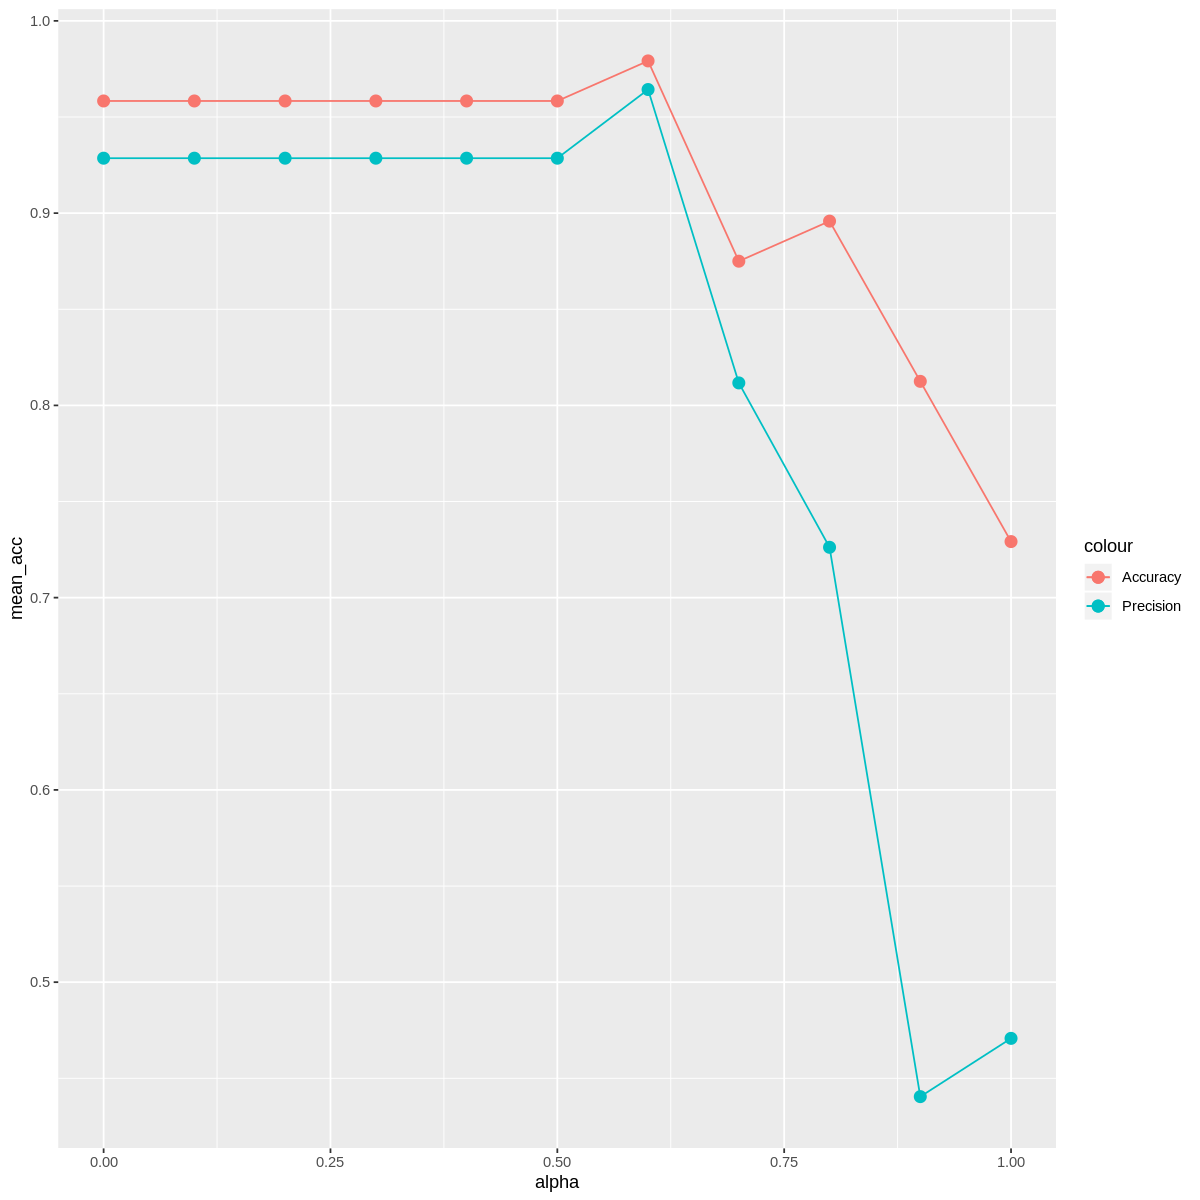

In [0]:
# visualize accuracy and precision over different alpha
dff = data.frame(alpha=seq(1, 0, -0.1), centroids = total_dist_centroids,
                 acc = mean_acc, prec = mean_prec)

p <- ggplot(dff) + 
  geom_point(aes(x=alpha, y=mean_acc, colour="Accuracy"), size=3) + 
  geom_line(aes(x=alpha, y=mean_acc, colour="Accuracy")) +
  geom_point(aes(x=alpha, y=mean_prec, colour="Precision"), size=3) + 
  geom_line(aes(x=alpha, y=mean_prec, colour="Precision"))

p


[1] "CTDsim for alpha = 0.60..."


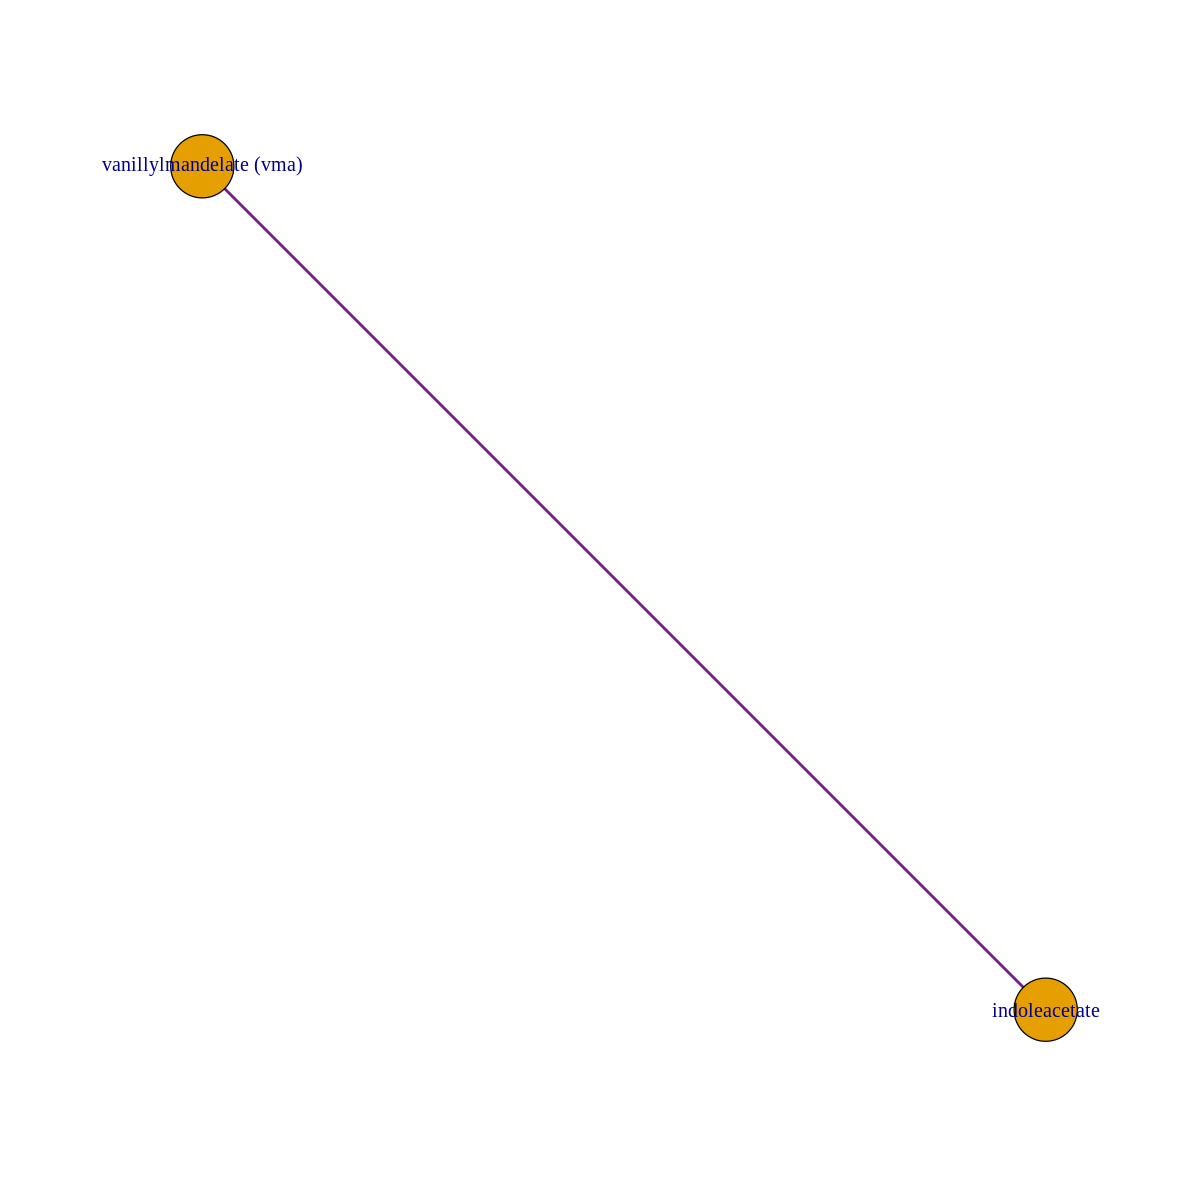

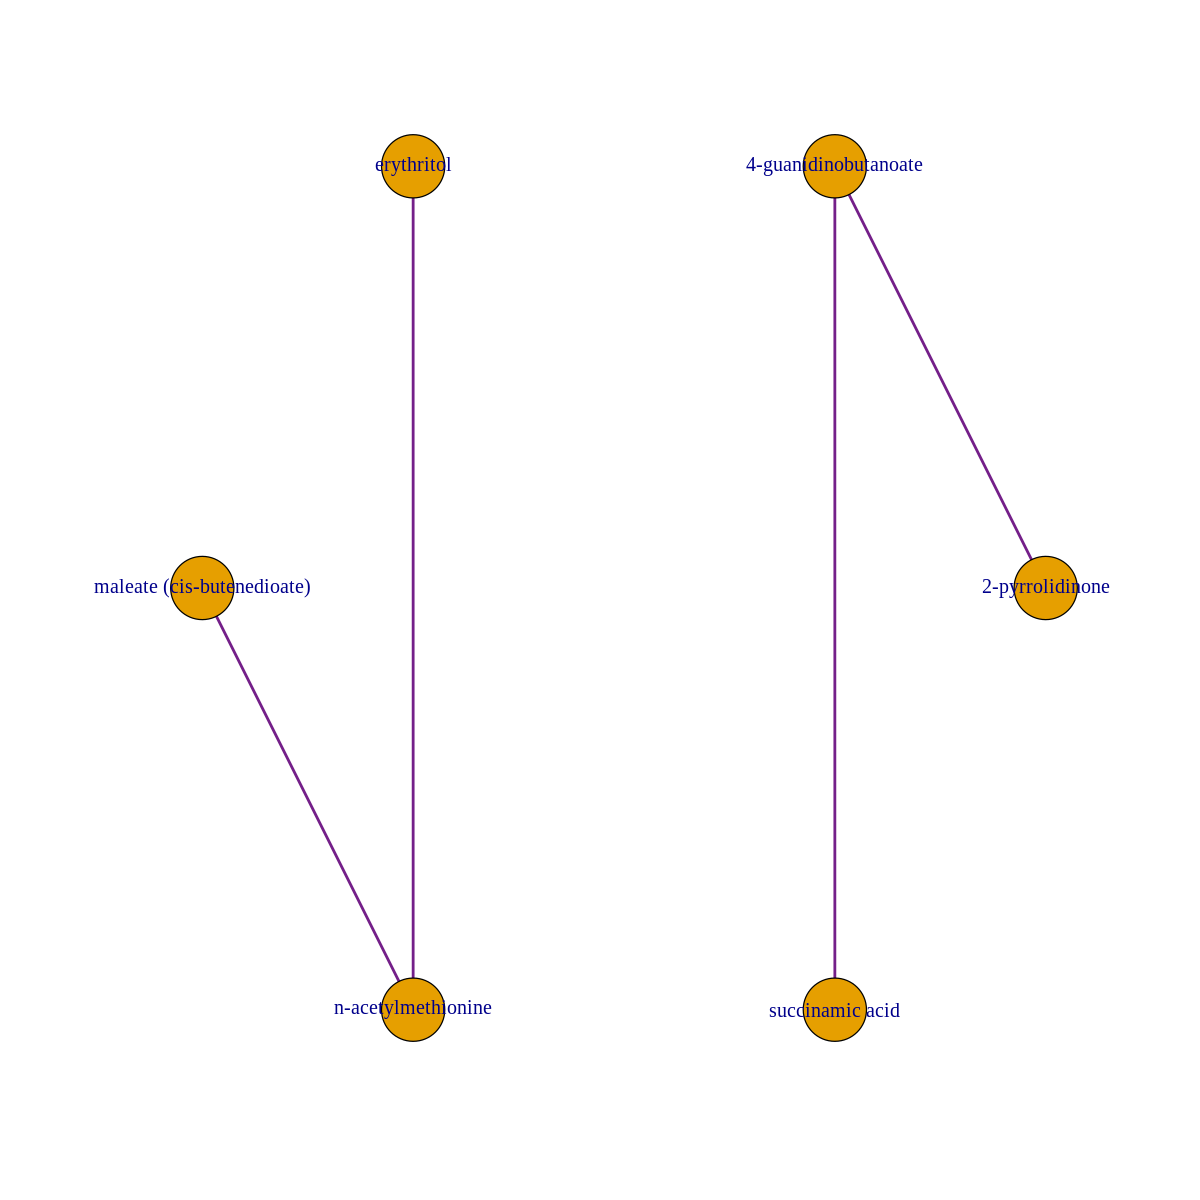

png 
  2

png 
  2

png 
  2

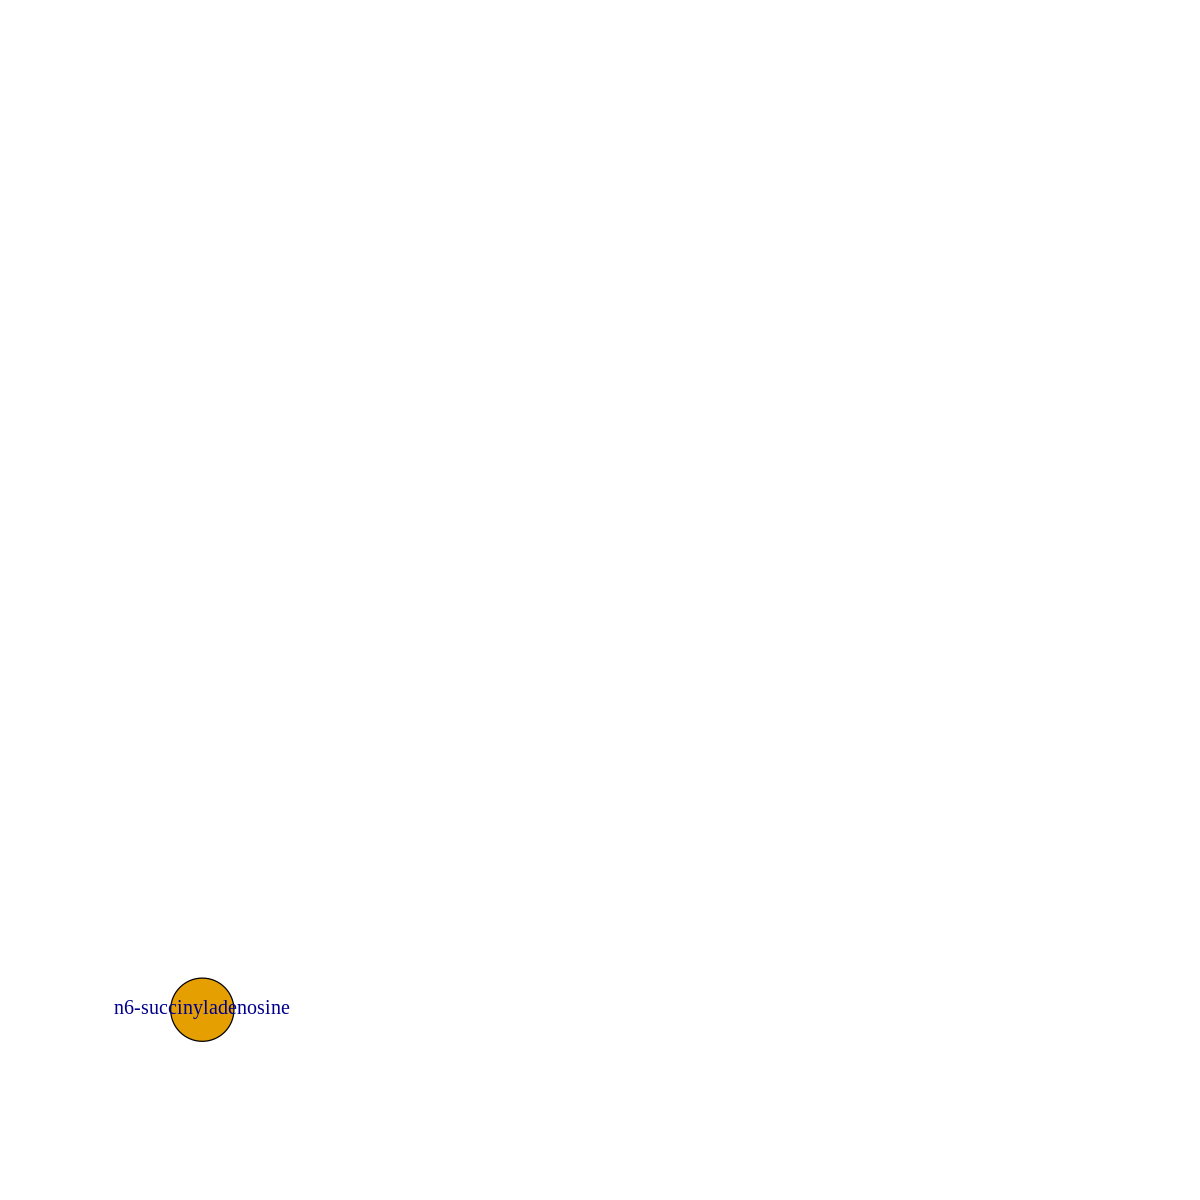

In [0]:
#### PtSim Blowouts ####
alpha=0.6 # choosed the best alpha 
print(sprintf("CTDsim for alpha = %.2f...", alpha))

res_model=list()
for (model in c('aadc','abat','adsl')){
  res_all = loadToEnv(sprintf("./output/ptSim/sn_ptSim_%s_norm.RData", "abat"))[["res_all"]]
  res_tmp = lapply(res_all, function(i) i$ncd)
  res_tmp2 = lapply(res_all, function(i) i$jac)
  res_model[[model]]= alpha*mle.getMinPtDistance(res_tmp) + (1-alpha)*mle.getMinPtDistance(res_tmp2)
  diag(res_model[[model]]) = 0
}
res_overall = mle.getMinPtDistance(res_model)
colnames(res_overall) = colnames(res_all[[1]]$ncd)
res_overall[which(res_overall<0)] = 0
res_overall = res_overall/max(res_overall)

diags = colnames(res_all[[1]]$ncd)
diags = gsub("[[:digit:]]", "", diags)

# kmeans
centroid = list()
for (diag in c('aadc','gabat','adsl','ref')){
  centroid[[diag]] = apply(res_overall[which(diags==toupper(diag)),], 2, mean)
}
names(centroid) <- c('aadc','abat','adsl','negCntl')
kmns = kmeans(res_overall, centers = rbind(centroid[[1]],centroid[[2]],centroid[[3]],centroid[[4]]))
df = cbind(as.numeric(kmns$cluster), diags, colnames(res_overall))
colnames(df) = c("cluster.num", "diag", "ptID")
c1 = df[which(df[,1]=="1"), "diag"]
c2 = df[which(df[,1]=="2"), "diag"]
c3 = df[which(df[,1]=="3"), "diag"]
c4 = df[which(df[,1]=="4"), "diag"]
  
ig_pruned = list()
for (model in c('aadc','abat','adsl')){
  ig_pruned[[model]]=loadToEnv(system.file('networks', 'bg_abat_maps_naive.RData', package='CTD'))[['ig_pruned']]
}
c1 = mle.blowoutSim(res_overall, data_mx, df[which(df[,1]=="1"),"ptID"], ig_pruned, 15)
c2 = mle.blowoutSim(res_overall, data_mx, df[which(df[,1]=="2"),"ptID"], ig_pruned, 15)
c3 = mle.blowoutSim(res_overall, data_mx, df[which(df[,1]=="3"),"ptID"], ig_pruned, 15)

plot.igraph(c1, layout=layout.circle, edge.width=50*abs(E(c1)$weight), edge.color="#741F89")
plot.igraph(c2, layout=layout.circle, edge.width=50*abs(E(c1)$weight), edge.color="#741F89")
#plot.igraph(c3, layout=layout.circle, edge.width=50*abs(E(c1)$weight), edge.color="#741F89")
plot.igraph(c3, layout=layout.circle)

png("./output/ptSim/figure/c1_module.png")
plot.igraph(c1, layout=layout.circle, edge.width=50*abs(E(c1)$weight), edge.color="#741F89")
dev.off()

png("./output/ptSim/figure/c2_module.png")
plot.igraph(c2, layout=layout.circle, edge.width=1+50*abs(E(c2)$weight), edge.color="#741F89")
dev.off()

png("./output/ptSim/c3_module.png")
#plot.igraph(c3, layout=layout.circle, edge.width=50*abs(E(c3)$weight), edge.color="#741F89")
plot.igraph(c3, layout=layout.circle)
dev.off()



You can view results of Jaccard Set Similarity by choosing alpha = 0

## Interpret individual metabolomics profiles using set-based or topological-based pathway enrichment methods.

In [0]:
# Set-based: ORA, MSEA
stats.getORA_Metabolon(data_mx[,"ABAT001"], threshold = 2, type = "zscore")
# Topological-based: CePa, DEGraph, PRS, SPIA

# Compare to CTD.

# Comparison between CTD and Partial Least Square (PLS) regression classifier

CTD can serve as a feature selection method for other classifiers. We will next compare it to a basic variance-based feature selection method.

In [0]:
# CTD feature selection
kmx=15
module_select = list()

for (model in c("aadc", "abat", "adsl")) {
  load(sprintf("./sup_data/Encoding/mn_model_%s_maps.RData", model))
  df_memory = data.frame(ptID=character(), m=numeric(), stringsAsFactors = FALSE)
  pts = unique(df[,"ptID"])
  pts = pts[grep(toupper(model), pts)]
  for (pt in 1:length(pts)) {
    pt_dt = df[which(df[,"ptID"]==pts[pt]),]
    df_memory[pt, "ptID"] = pts[pt]
    df_memory[pt, "m"] = pt_dt[which.max(pt_dt[,"d"]), "d"]-log2(kmx)
  }
  res = df[which(df[,"ptID"]==df_memory$ptID[which.max(df_memory$m)]),]
  module_select[[model]] = unlist(strsplit(as.character(res[which.max(res[,"d"]), "S"]), split="/"))
}

In [0]:
# define imputeMissingValues function so that imputeMissingValues(data,ref) returns a new data where NAs are replaced by observed minimum in reference dataset
imputeMissingValues = function(data, ref) {
  data = data[which(rownames(data) %in% rownames(ref)),]
  ref = ref[which(rownames(ref) %in% rownames(data)),]
  data = data[sort(rownames(data)),]
  ref = ref[sort(rownames(ref)),]
  
  imputed.data = data
  for (met in 1:nrow(ref)) {
    rowData = ref[met,]
    if (any(is.na(rowData))) {
      rowData = as.numeric(rowData[-which(is.na(rowData))])
    } else {
      rowData = as.numeric(rowData)
    }
    # Impute using uniform random variable, where a = 0.99*observed minimum, and b = observed minimum
    min_row = min(rowData)
    if (min_row<0) {
      min_row = -1*min_row
      imputed.data[met, is.na(data[met,])] = tryCatch(-1*runif(sum(is.na(data[met,])), min = 0.99*min_row, max= min_row), 
                                                      error = function(e) e, warning=function(w) print(sprintf("%s: met%d", w, met)))
    } else {
      imputed.data[met, is.na(data[met,])] = tryCatch(runif(sum(is.na(data[met,])), min = 0.99*min(rowData), max= min(rowData)), 
                                                      error = function(e) e, warning=function(w) print(sprintf("%s: met%d", w, met)))
    }
  }
  return(imputed.data)
}

In [0]:
# data matrices in this step: 1)contains no NA vaules 
#                       2)only metabolites represented in >50% diagnosed patients are included
data(Thistlethwaite2019)
data_mx = suppressWarnings(apply(as.matrix(data_mx), c(1,2), as.numeric))[,-c(1,2,3,4,5,6,7,8)]
data_mx = data_mx[,-grep("UDN", colnames(data_mx))]
ref_data = data_mx[,grep("REF", colnames(data_mx))]

# ABAT fill rate
abat_data = data_mx[, grep("GABAT", colnames(data_mx))]
abat_fill = apply(abat_data, 1, function(i) sum(is.na(i))/length(i))
# AADC fill rate
aadc_data = data_mx[, grep("AADC", colnames(data_mx))]
aadc_fill = apply(aadc_data, 1, function(i) sum(is.na(i))/length(i))
# ADSL fill rate
adsl_data = data_mx[, grep("ADSL", colnames(data_mx))]
adsl_fill = apply(adsl_data, 1, function(i) sum(is.na(i))/length(i))
df_fillrate = data_mx[intersect(intersect(which(abat_fill<0.50), which(aadc_fill<0.50)), which(adsl_fill<0.50)), ]

In [0]:
diags

[1] 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[77] 0 0 0 0 0 0 0 0 0 0

In [0]:
require(pROC)
require(pls)

df_vis=list()

df_ROC = data.frame(matrix(ncol = 6, nrow = 5))
colnames(df_ROC) = sapply(c('AADC','GABAT','ADSL'),function(x) paste(x,c('ROC_AUC','Precision@0.5'),sep = '.'))
rownames(df_ROC) = c('PLSvar','PLSvar_CTD','PLSctd','PLSctd_CTD','CTD')

for (model in c("aadc", "abat", "adsl")) {
  load(sprintf("./sup_data/Encoding/mn_model_%s_maps.RData", model))
  df_memory = data.frame(ptID=character(), m=numeric(), stringsAsFactors = FALSE)
  pts = unique(df[,"ptID"])
  for (pt in 1:length(pts)) {
    pt_dt = df[which(df[,"ptID"]==pts[pt]),]
    df_memory[pt, "ptID"] = pts[pt]
    df_memory[pt, "m"] = pt_dt[which.max(pt_dt[,"d"]), "d"]-log2(kmx)
  }
  df_memory = df_memory[which(df_memory[,"ptID"] %in% colnames(df_fillrate)),]

  # prepare data matrix for PLS model with variance based feature selection
  df_mn = apply(df_fillrate[,grep(toupper(model), colnames(df_fillrate))], 1, function(i) mean(na.omit(i)))
  df2 = as.data.frame(df_fillrate[order(abs(df_mn), decreasing = TRUE)[1:length(module_select[[model]])], ])
  if (any(is.na(df2))) { df2 = imputeMissingValues(df2, ref_data) }
  # Get diagnostic labels
  diags = colnames(df2)
  diags[-grep(toupper(model), diags)] = 0
  diags[grep(toupper(model), diags)] = 1
  df2 = rbind(df_memory$m, df2)
  rownames(df2)[1] = "metabolomics_evidence"
  df2 = rbind(diags, df2)
  rownames(df2)[1] = "diag"
  df2 = apply(df2, c(1,2), as.numeric)

  # prepare data matrix for PLS model with CTD feature selection
  df2_ctd = df_fillrate[which(rownames(df_fillrate) %in% module_select[[model]]), ]
  if (any(is.na(df2_ctd))) { df2_ctd = imputeMissingValues(df2_ctd, ref_data) }
  # Get diagnostic labels
  diags = colnames(df2_ctd)
  diags[-grep(toupper(model), diags)] = 0
  diags[grep(toupper(model), diags)] = 1
  df2_ctd = rbind(df_memory$m, df2_ctd)
  rownames(df2_ctd)[1] = "metabolomics_evidence"
  df2_ctd = rbind(diags, df2_ctd)
  rownames(df2_ctd)[1] = "diag"
  df2_ctd = apply(df2_ctd, c(1,2), as.numeric)
  
  # prepare datafram for ROC
  dff_model = data.frame(pls_var=numeric(), pls_ctd=numeric(), 
                         pls_var_ctd=numeric(), pls_ctd_ctd=numeric(), 
                         pls_x_ctd=numeric(),stringsAsFactors = FALSE)

  for (it in 1:ncol(df2)) {
    isTrain = c(1:ncol(df2))[-it] # leave-one-out cross validation
    # Variance-based feature selection: Train model
    df2_2 = df2[-which(rownames(df2)=="metabolomics_evidence"), ]
    model_res = plsr(diag~., data = as.data.frame(t(df2_2[,isTrain])))
    tst_data = df2_2[-1,-isTrain]
    model_tst =  predict(model_res, ncomp=model_res$ncomp, newdata=as.data.frame(t(tst_data)))
    dff_model[it, "pls_var"] = model_tst

    # CTD feature selection: Train model
    df2_ctd_2 = df2_ctd[-which(rownames(df2_ctd)=="metabolomics_evidence"), ]
    ctd_res = plsr(diag~., data = as.data.frame(t(df2_ctd_2[,isTrain])))
    tst_data = df2_ctd_2[-1,-isTrain]
    ctd_tst = predict(ctd_res, ncomp=ctd_res$ncomp, newdata=as.data.frame(t(tst_data)))
    dff_model[it, "pls_ctd"] = ctd_tst
    
    # Variance-based feature selection, plus CTD as covariate
    model_res = plsr(diag~., data = as.data.frame(t(df2[,isTrain])))
    tst_data = df2[-1,-isTrain]
    model_tst =  predict(model_res, ncomp=model_res$ncomp, newdata=as.data.frame(t(tst_data)))
    dff_model[it, "pls_var_ctd"] = model_tst

    # CTD feature selection, plus CTD as covariate
    ctd_res = plsr(diag~., data = as.data.frame(t(df2_ctd[,isTrain])))
    tst_data = df2_ctd[-1,-isTrain]
    ctd_tst = predict(ctd_res, ncomp=ctd_res$ncomp, newdata=as.data.frame(t(tst_data)))
    dff_model[it, "pls_ctd_ctd"] = ctd_tst
    
    #No features, just CTD as only covariate
    #xx_tmp = df2_ctd[-(3:nrow(df2_ctd)),]
    #x_res = plsr(diag~., data = as.data.frame(t(xx_tmp[,isTrain])))
    #tst_data = xx_tmp[-1,-isTrain]
    #names(tst_data) = "metabolomics_evidence"
    #x_tst = predict(x_res, ncomp=x_res$ncomp, newdata=as.data.frame(t(tst_data)))
    #dff_model[it, "pls_x_ctd"] = ctd_tst
  }

    if (model=="abat") {
    print("For ABAT model...")
  } else if (model=="aadc") {
    print("For AADC model...")
  } else {
    print("For ADSL model...")
  }

  # Calculate AUC using pROC, since you cannot calculate directly with TP, TN, FP, FN
  plsvar_auc = roc(diags, dff_model[,"pls_var"])
  plsctd_auc = roc(diags, dff_model[,"pls_ctd"])
  plsvar_ctd_auc = roc(diags, dff_model[,"pls_var_ctd"])
  plsctd_ctd_auc = roc(diags, dff_model[,"pls_ctd_ctd"])
  #ctd_auc = roc(diags, dff_model[,"pls_x_ctd"])
  m = df_memory$m-min(df_memory$m)
  ctd_auc = roc(diags, m/max(m))

  print(sprintf("PLS.var     AUC = %.3f", plsvar_auc$auc))
  print(sprintf("PLS.ctd     AUC = %.3f", plsctd_auc$auc))
  print(sprintf("PLS.var+CTD AUC = %.3f", plsvar_ctd_auc$auc))
  print(sprintf("PLS.ctd+CTD AUC = %.3f", plsctd_ctd_auc$auc))
  print(sprintf("CTD AUC = %.3f", ctd_auc$auc))
  
  plsvar_auc2 = coords(plsvar_auc, 0.5, ret=c("threshold", "specificity", "accuracy", "precision", "recall"))
  plsctd_auc2 = coords(plsctd_auc, 0.5, ret=c("threshold", "specificity", "accuracy", "precision", "recall"))
  plsvar_ctd_auc2 = coords(plsvar_ctd_auc, 0.5, ret=c("threshold", "specificity", "accuracy", "precision", "recall"))
  plsctd_ctd_auc2 = coords(plsctd_ctd_auc, 0.5, ret=c("threshold", "specificity", "accuracy", "precision", "recall"))
  ctd_auc2 = coords(ctd_auc, 0.5, ret=c("threshold", "specificity", "accuracy", "precision", "recall"))

  print(plsvar_auc2)
  print(plsctd_auc2)
  print(plsvar_ctd_auc2)
  print(plsctd_ctd_auc2)
  print(ctd_auc2)
  
  plsvar_auc2 = coords(plsvar_auc, "best", ret=c("threshold", "specificity", "accuracy", "precision", "recall"))
  plsctd_auc2 = coords(plsctd_auc, "best", ret=c("threshold", "specificity", "accuracy", "precision", "recall"))
  plsvar_ctd_auc2 = coords(plsvar_ctd_auc, "best", ret=c("threshold", "specificity", "accuracy", "precision", "recall"))
  plsctd_ctd_auc2 = coords(plsctd_ctd_auc, "best", ret=c("threshold", "specificity", "accuracy", "precision", "recall"))
  ctd_auc2 = coords(ctd_auc, "best", ret=c("threshold", "specificity", "accuracy", "precision", "recall"))

  print(plsvar_auc2)
  print(plsctd_auc2)
  print(plsvar_ctd_auc2)
  print(plsctd_ctd_auc2)
  print(ctd_auc2)
  # Now calculate precision manually
  scores_model = list()
  m = df_memory$m-min(df_memory$m)
  scores_model[["ctd"]] = m/max(m)
  scores_model[["plsvar"]] = dff_model[,"pls_var"]
  scores_model[["plsctd"]] = dff_model[,"pls_ctd"]
  scores_model[["plsvar.ctd"]] = dff_model[,"pls_var_ctd"]
  scores_model[["plsctd.ctd"]] = dff_model[,"pls_ctd_ctd"]
  diags = as.numeric(diags)
  dff = data.frame(model=character(), precision=numeric(), recall=numeric(), specificity=numeric(), stringsAsFactors = FALSE)
  r=1
  for (mdl in c("ctd", "plsvar", "plsctd", "plsvar.ctd", "plsctd.ctd")) {
    for (thresh in seq(0, 1, 0.001)) {
      tp = length(intersect(which(scores_model[[mdl]]>=thresh), which(diags==1)))
      fp = length(intersect(which(scores_model[[mdl]]>=thresh), which(diags==0)))
      fn = length(intersect(which(scores_model[[mdl]]<thresh), which(diags==1)))
      tn = length(intersect(which(scores_model[[mdl]]<thresh), which(diags==0)))
      dff[r, "model"] = mdl
      dff[r, "thresh"] = thresh
      dff[r, "precision"] = tp/(tp+fp)
      dff[r, "recall"] = tp/(tp+fn)
      dff[r, "specificity"] = 1-fp/(fp+tn)
      r = r + 1
    }
      # for ROC visualization 
  df_vis[[model]] = data.frame(specificity=c(1-plsvar_auc$specificities, 1-plsctd_auc$specificities, 
                                    1-plsvar_ctd_auc$specificities, 1-ctd_auc$specificities),
                      sensitivity=c(plsvar_auc$sensitivities, plsctd_auc$sensitivities, 
                                    plsvar_ctd_auc$sensitivities, ctd_auc$sensitivities),
                      method=c(rep("PLSvar", length(plsvar_auc$specificities)), 
                               rep("PLSctd", length(plsctd_auc$specificities)),
                               rep("PLSvar-CTD", length(plsvar_ctd_auc$specificities)),
                               rep("CTD", length(ctd_auc$specificities))))
  }
  df_ROC[,grep(toupper(model),colnames(df_ROC))]=c(c(plsvar_auc$auc,
                                                    plsvar_ctd_auc$auc,
                                                    plsctd_auc$auc,
                                                    plsctd_ctd_auc$auc,
                                                    ctd_auc$auc),
                                                c(plsvar_auc2['precision'],
                                                  plsvar_ctd_auc2['precision'],
                                                  plsctd_auc2['precision'],
                                                  plsctd_ctd_auc2['precision'],
                                                  ctd_auc2['precision'])
                                                #  dff[which(dff$thresh==0.5),"precision"][c(2,4,3,5,1)]
                                                  )
}


Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: pls


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




[1] "For AADC model..."


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "PLS.var     AUC = 0.992"
[1] "PLS.ctd     AUC = 0.827"
[1] "PLS.var+CTD AUC = 1.000"
[1] "PLS.ctd+CTD AUC = 0.980"
[1] "CTD AUC = 0.992"


Warning message in coords.roc(plsvar_auc, 0.5, ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsctd_auc, 0.5, ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsvar_ctd_auc, 0.5, ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsctd_ctd_a

          threshold specificity  accuracy precision    recall
threshold       0.5           1 0.9767442         1 0.3333333
          threshold specificity  accuracy precision    recall
threshold       0.5           1 0.9767442         1 0.3333333
          threshold specificity accuracy precision recall
threshold       0.5           1        1         1      1
          threshold specificity  accuracy precision    recall
threshold       0.5           1 0.9767442         1 0.3333333
          threshold specificity  accuracy precision recall
threshold       0.5   0.9879518 0.9883721      0.75      1


Warning message in coords.roc(plsvar_auc, "best", ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsctd_auc, "best", ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsvar_ctd_auc, "best", ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(pls

          threshold specificity  accuracy precision recall
threshold 0.3572327   0.9879518 0.9883721      0.75      1
          threshold specificity  accuracy precision    recall
threshold 0.4753694           1 0.9883721         1 0.6666667
          threshold specificity accuracy precision recall
threshold  0.472084           1        1         1      1
          threshold specificity  accuracy precision recall
threshold 0.1464087    0.939759 0.9418605     0.375      1
          threshold specificity  accuracy precision recall
threshold 0.4179529   0.9879518 0.9883721      0.75      1


Warning message in `[<-.data.frame`(`*tmp*`, , grep(toupper(model), colnames(df_ROC)), :
“provided 10 variables to replace 2 variables”


[1] "For ABAT model..."


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "PLS.var     AUC = 0.958"
[1] "PLS.ctd     AUC = 0.944"
[1] "PLS.var+CTD AUC = 0.964"
[1] "PLS.ctd+CTD AUC = 0.973"
[1] "CTD AUC = 0.971"


Warning message in coords.roc(plsvar_auc, 0.5, ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsctd_auc, 0.5, ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsvar_ctd_auc, 0.5, ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsctd_ctd_a

          threshold specificity  accuracy precision    recall
threshold       0.5   0.9620253 0.9186047       0.5 0.4285714
          threshold specificity  accuracy precision    recall
threshold       0.5   0.9873418 0.9302326 0.6666667 0.2857143
          threshold specificity  accuracy precision    recall
threshold       0.5           1 0.9651163         1 0.5714286
          threshold specificity  accuracy precision    recall
threshold       0.5   0.9873418 0.9534884       0.8 0.5714286
          threshold specificity  accuracy precision    recall
threshold       0.5           1 0.9534884         1 0.4285714


Warning message in coords.roc(plsvar_auc, "best", ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsctd_auc, "best", ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsvar_ctd_auc, "best", ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(pls

          threshold specificity  accuracy precision recall
threshold 0.2648322   0.9113924 0.9186047       0.5      1
          threshold specificity  accuracy precision recall
threshold 0.2071889   0.8987342 0.9069767 0.4666667      1
          threshold specificity accuracy precision recall
threshold 0.2211328   0.8607595 0.872093 0.3888889      1
          threshold specificity  accuracy precision recall
threshold 0.2041654   0.8987342 0.9069767 0.4666667      1
          threshold specificity  accuracy precision recall
threshold 0.2067247   0.8481013 0.8604651 0.3684211      1


Warning message in `[<-.data.frame`(`*tmp*`, , grep(toupper(model), colnames(df_ROC)), :
“provided 10 variables to replace 2 variables”


[1] "For ADSL model..."


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "PLS.var     AUC = 0.984"
[1] "PLS.ctd     AUC = 0.992"
[1] "PLS.var+CTD AUC = 0.992"
[1] "PLS.ctd+CTD AUC = 0.992"
[1] "CTD AUC = 0.978"


Warning message in coords.roc(plsvar_auc, 0.5, ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsctd_auc, 0.5, ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsvar_ctd_auc, 0.5, ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsctd_ctd_a

          threshold specificity  accuracy precision    recall
threshold       0.5           1 0.9767442         1 0.3333333
          threshold specificity  accuracy precision    recall
threshold       0.5           1 0.9767442         1 0.3333333
          threshold specificity  accuracy precision    recall
threshold       0.5           1 0.9767442         1 0.3333333
          threshold specificity  accuracy precision    recall
threshold       0.5           1 0.9883721         1 0.6666667
          threshold specificity  accuracy precision    recall
threshold       0.5           1 0.9883721         1 0.6666667


Warning message in coords.roc(plsvar_auc, "best", ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsctd_auc, "best", ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(plsvar_ctd_auc, "best", ret = c("threshold", "specificity", :
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”
Warning message in coords.roc(pls

          threshold specificity  accuracy precision recall
threshold 0.1960417   0.9518072 0.9534884 0.4285714      1
          threshold specificity  accuracy precision recall
threshold 0.3120928   0.9879518 0.9883721      0.75      1
          threshold specificity  accuracy precision recall
threshold 0.2160995   0.9759036 0.9767442       0.6      1
          threshold specificity  accuracy precision recall
threshold  0.229389   0.9759036 0.9767442       0.6      1
          threshold specificity  accuracy precision recall
threshold 0.2439895   0.9277108 0.9302326 0.3333333      1


Warning message in `[<-.data.frame`(`*tmp*`, , grep(toupper(model), colnames(df_ROC)), :
“provided 10 variables to replace 2 variables”


In [0]:
df_ROC

,AADC.ROC_AUC,AADC.Precision@0.5,GABAT.ROC_AUC,GABAT.Precision@0.5,ADSL.ROC_AUC,ADSL.Precision@0.5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PLSvar,0.9919679,1.00,0.9584087,0.5000000,0.9839357,1
PLSvar_CTD,1.0000000,1.00,0.9638336,1.0000000,0.9919679,1
PLSctd,0.8273092,1.00,0.9439421,0.6666667,0.9919679,1
PLSctd_CTD,0.9799197,1.00,0.9728752,0.8000000,0.9919679,1
CTD,0.9919679,0.75,0.9710669,1.0000000,0.9779116,1


# Exercise <a name="Exercise"></a>

Below we provide 3 challenge tasks you should be able to manage given the examples shown above. Example answers to the following exercises are provided [here - TODO](https://github.com/BRL-BCM/CTD/tree/master/vignette).

1. Run CTD on all patients in data_mx for the top 15 most perturbed metabolites in each profile using the adaptive diffusion encoding algorithm.

2. Visualize the module responsible for the signal observed in one of the samples with a significance Bonferroni < 0.05.

3. Run one sample's top 15 most perturbed metabolites across multiple networks. Which network(s) does it match strongest to? Which network(s) does it match poorly to?
